# TPROC-C Analysis

In [71]:
import matplotlib.pyplot as plt
import numpy as np

Open log files

In [72]:
def log_opener(file_path):
    with open(file_path, 'r') as file:
    # Read all lines from the file
        lines = file.readlines()
        
    empty_list = []

    # Iterate over lines starting from the third line (index 2)
    for line in lines[2:]:
        # Split each line by spaces
        parts = line.split()
    
        # Extract the first number from the parts and convert it to an integer
        first_number = int(parts[0])
    
        # Append the first number to the list
        empty_list.append(first_number)

    # Print the list of first numbers
    return empty_list

In [90]:
# Open and read the file
hammer_1 = log_opener("C:\\Users\\valer\\Downloads\\hammer_500.log") # SF = 500 transactions in total
hammer_2 = log_opener("C:\\Users\\valer\\Downloads\\hammer_5000.log") # SF = 5,000 transactions in total
hammer_3 = log_opener("C:\\Users\\valer\\Downloads\\hammer_50000.log") # SF = 50,000 transactions in total
hammer_4 = log_opener("C:\\Users\\valer\\Downloads\\hammer_500000.log") # SF = 500,000 transactions in total

Write functions to plot only the test time (no rampup time and non-working time)

In [91]:
def sublist_creator(time_series):
    flag = 0
    outer_list = []
    inner_list = []

    for element in time_series:
    
        if element > 750 and flag == 0:
            flag = 1
            inner_list.append(element)
    
        if element > 750 and flag == 1:
            inner_list.append(element)
        
        if element <= 750 and flag == 1:
            flag = 0
            outer_list.append(inner_list)
            inner_list = []
            
    return outer_list

In [92]:
sublist_hammer_1 = sublist_creator(hammer_1)
sublist_hammer_2 = sublist_creator(hammer_2)
sublist_hammer_3 = sublist_creator(hammer_3)
sublist_hammer_4 = sublist_creator(hammer_4)

In [93]:
def calculate_averages(lists):
    
    # Aligns the inner lists (as they may have different lengths)
    max_len = max(map(len, lists))
    aligned_lists = [lst + [0] * (max_len - len(lst)) for lst in lists]
    
    # Use zip to iterate over the corresponding elements of each list
    averages = [sum(values) / len(values) for values in zip(*aligned_lists)]
    
    return averages

In [94]:
avg_hammer_1 = calculate_averages(sublist_hammer_1)
avg_hammer_2 = calculate_averages(sublist_hammer_2)
avg_hammer_3 = calculate_averages(sublist_hammer_3)
avg_hammer_4 = calculate_averages(sublist_hammer_4)

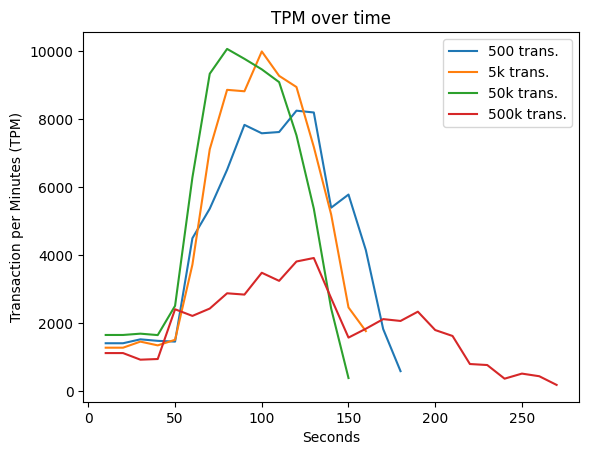

In [95]:
# Create a line plot for each list
x_values = np.arange(10, 10 + len(avg_hammer_1) * 10, 10)
plt.plot(x_values, avg_hammer_1, label='500 trans.')
x_values = np.arange(10, 10 + len(avg_hammer_2) * 10, 10)
plt.plot(x_values, avg_hammer_2, label='5k trans.')
x_values = np.arange(10, 10 + len(avg_hammer_3) * 10, 10)
plt.plot(x_values, avg_hammer_3, label='50k trans.')
x_values = np.arange(10, 10 + len(avg_hammer_4) * 10, 10)
plt.plot(x_values, avg_hammer_4, label='500k trans.')

# Add labels and title
plt.xlabel('Seconds')
plt.ylabel('Transaction per Minutes (TPM)')
plt.title('TPM over time')

# Add legend
plt.legend()

# Show the plot
plt.show()

Main observation: the scale is too small to observe any interesting difference (all the tests lasted for way less than the maximum duration, 600 seconds).

Biggest scale: the system decided to spread more the transactions over time.